# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

The purpose of the project is to conduct an analysis of Megaline's prepaid plans (Surf and Ultimate) based on data from 500 customers.

The goal is to determine which plan generates more revenue to help adjust the advertising budget effectively.


1- Organize and clean the data in order to have a clear analysis.

2- Analyze the usage patterns of customers on both plans, including the number of calls, minutes, messages, and internet usage.

3- Calculate and compare the revenue generated by each plan based on its pricing structure.

4- Provide insights and recommendations based on the analysis to determine which plan is more profitable for Megaline.

## Inicialização

In [3]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## Carregue os dados

In [4]:
# Carregue os arquivos de dados em diferentes DataFrames

calls_df = pd.read_csv("/datasets/megaline_calls.csv")
internet_df = pd.read_csv("/datasets/megaline_internet.csv")
messages_df = pd.read_csv("/datasets/megaline_messages.csv")
plans_df = pd.read_csv("/datasets/megaline_plans.csv")
user_df = pd.read_csv("/datasets/megaline_users.csv")

<div class="alert alert-block alert-success">
<b>Comentário final </b> <a class="tocSkip"></a>

Os dados foram carregados corretamente



</div>

## Prepare os dados

We will explore each data and check for possible errors such as (duplicate data, missing values, data types)  and resolve this issues to ensure the data is clean and ready for analysis.

## Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprima uma amostra de dados dos planos
print(plans_df)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


As we can find the dataframe contains 2 rows which are for each type of plan, and 8 columns with the information about what each plan offer.

## Corrija os dados

Neither null value nor duplications are included in the dataframe, which don't need any alteration.
Also type of data for each column is appropriate (such as int, float, object)

## Enriqueça os dados

We can add to each type of plan a new colum named as plan_id corresponding to each plan
Also rearrenge the columns so the plan_id and plan_name will be showed first

In [5]:
plans_df["plan_id"] = [110, 111]
plans_df = plans_df[["plan_id","plan_name","messages_included", "mb_per_month_included", "minutes_included","usd_monthly_pay", "usd_per_gb","usd_per_message", "usd_per_minute"]]
plans_df

,plan_id,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,110,surf,50,15360,500,20,10,0.03,0.03
1,111,ultimate,1000,30720,3000,70,7,0.01,0.01


## Usuários

In [6]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários

user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprima uma amostra de dados dos usuários

print(user_df.head(20))

    user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenkins   52   
4      1004    Leonila   Thompson   40   
5      1005      Livia    Shields   31   
6      1006     Jesusa   Bradford   73   
7      1007    Eusebio      Welch   42   
8      1008      Emely    Hoffman   53   
9      1009      Gerry     Little   19   
10     1010     Wilber      Blair   52   
11     1011     Halina      Henry   73   
12     1012    Jonelle    Mcbride   59   
13     1013    Nicolas     Snider   50   
14     1014    Edmundo      Simon   61   
15     1015      Beata  Carpenter   26   
16     1016       Jann    Salinas   30   
17     1017      Boris      Gates   61   
18     1018     Dennis     Grimes   70   
19     1019     Shizue     Landry   34   

                                                city    reg_date      plan  \
0              Atlanta-Sandy Springs-Ro

As we can see the dataframe consist of 8 columns (with 500 data) stating the ID, First and Last name and age of each user; also their location, the day they registered to the plan and which type of plan.

Each column has appropiate data type
churn_date column contain null values indicating that the plan still ongoing.

We can replace this null values with other values.

### Corrija os dados

Will replace the null values with 0.

We can check for duplicate data and remove it to make our analysis more clear

No duplicates were found

In [8]:
user_df["churn_date"] = user_df["churn_date"].fillna(0)
user_df["churn_date"].isna() # All values now are not null

user_df.duplicated()
user_df["user_id"].duplicated() #checking for duplicates with same user_id
print("The number of unique values: ", user_df["user_id"].nunique()) #checking total number of unique values
user_df.duplicated(subset = ["first_name", "last_name"]) #checking for duplicates with same first name and last name

The number of unique values:  500


0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

### Enriqueça os dados

We can split the city columns into two columns one with city name and other with state

In [9]:
if "city" in user_df.columns: #used if codition in order to avoid key error everytime running this block
    user_df["city_name"] = user_df["city"].str.split(",").str[0] #create column with city name
    user_df["state"] = (user_df["city"].str.split(",").str[1]).str.strip() #create column with state code, .strip() to remove space
    user_df = user_df.drop(columns=["city"]) #remove city column
    user_df = user_df[["user_id", "first_name", "last_name", "age", "city_name", "state", "reg_date", "plan", "churn_date"]] #reorder the columns

#print(user_df["user_id"][user_df["plan"] == "surf"].count()) #check total number of surf plan users
#print(user_df["user_id"][user_df["plan"] == "ultimate"].count()) #check total number of ultimate plan users

## Chamadas

In [10]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprima uma amostra de dados das chamadas

print(calls_df.head(20))

          id  user_id   call_date  duration
0    1000_93     1000  2018-12-27      8.52
1   1000_145     1000  2018-12-27     13.66
2   1000_247     1000  2018-12-27     14.48
3   1000_309     1000  2018-12-28      5.76
4   1000_380     1000  2018-12-30      4.22
5   1000_388     1000  2018-12-31      2.20
6   1000_510     1000  2018-12-27      5.75
7   1000_521     1000  2018-12-28     14.18
8   1000_530     1000  2018-12-28      5.77
9   1000_544     1000  2018-12-26      4.40
10  1000_693     1000  2018-12-31      4.31
11  1000_705     1000  2018-12-31     12.78
12  1000_735     1000  2018-12-29      1.70
13  1000_778     1000  2018-12-28      3.29
14  1000_826     1000  2018-12-26      9.96
15  1000_842     1000  2018-12-27      5.85
16    1001_0     1001  2018-09-06     10.06
17    1001_1     1001  2018-10-12      1.00
18    1001_2     1001  2018-10-17     15.83
19    1001_4     1001  2018-12-05      0.00


This dataframe shows 4 columns with (137735 data) and there isn't any null value included.

Data type of each column is appropriate

As we can find each user did several calls (some on same days other on different days) and each call has a especific duration

### Corrija os dados

We can check for duplicate data and remove it to make our analysis more clear

No duplicates were found

In [12]:
calls_df.duplicated()
calls_df.duplicated(subset = "id") #checking for duplicates with same call id

0         False
1         False
2         False
3         False
4         False
          ...  
137730    False
137731    False
137732    False
137733    False
137734    False
Length: 137735, dtype: bool

### Enriqueça os dados

Also we can add a column indicating the day of the week the call was done so we can know on which day of the week calls are being occured more

In [13]:
calls_df["call_date"] = pd.to_datetime(calls_df["call_date"]) #to extract the day of the week
calls_df["day_of_week"] = calls_df["call_date"].dt.day_name() #add a column with the name of the day
calls_df["month"] = calls_df["call_date"].dt.month_name() #add a column with the month of the call
calls_df

,id,user_id,call_date,duration,day_of_week,month
0,1000_93,1000,2018-12-27,8.52,Thursday,December
1,1000_145,1000,2018-12-27,13.66,Thursday,December
2,1000_247,1000,2018-12-27,14.48,Thursday,December
3,1000_309,1000,2018-12-28,5.76,Friday,December
4,1000_380,1000,2018-12-30,4.22,Sunday,December
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,Wednesday,November
137731,1499_200,1499,2018-10-20,10.89,Saturday,October
137732,1499_201,1499,2018-09-21,8.12,Friday,September
137733,1499_202,1499,2018-10-10,0.37,Wednesday,October


## Mensagens

In [14]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprima uma amostra dos dados das mensagens

print(messages_df.head(20))

          id  user_id message_date
0   1000_125     1000   2018-12-27
1   1000_160     1000   2018-12-31
2   1000_223     1000   2018-12-31
3   1000_251     1000   2018-12-27
4   1000_255     1000   2018-12-26
5   1000_346     1000   2018-12-29
6   1000_386     1000   2018-12-30
7   1000_413     1000   2018-12-31
8   1000_502     1000   2018-12-27
9   1000_525     1000   2018-12-28
10  1000_567     1000   2018-12-25
11    1001_1     1001   2018-11-14
12    1001_2     1001   2018-08-17
13    1001_5     1001   2018-12-05
14    1001_7     1001   2018-11-28
15    1001_9     1001   2018-10-23
16   1001_10     1001   2018-09-01
17   1001_11     1001   2018-11-18
18   1001_17     1001   2018-12-11
19   1001_18     1001   2018-10-01


This dataframe shows 3 columns with (76051 data) and there isn't any null value included.

Data type of each column is appropriate

As we can find each user sent several messages (some on same days other on different days)

The ID doesn't possess a specific order like message 1001_7 was on 28-11-2018 and message 1001_9 was on 23-10-2018 and 1001_11 was on 18-1-2018

### Corrija os dados

We can check for duplicate data and remove it to make our analysis more clear

No duplicates were found

In [18]:
messages_df.duplicated()
messages_df.duplicated(subset = "id") #checking for duplicates with same message id

0        False
1        False
2        False
3        False
4        False
         ...  
76046    False
76047    False
76048    False
76049    False
76050    False
Length: 76051, dtype: bool

### Enriqueça os dados

Also we can add a column indicating the day of the week the message was sent so we can know on which day of the week messages are being send more

In [19]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date']) #to extract the day of the week
messages_df['day_of_week'] = messages_df['message_date'].dt.day_name() #add a column with the name of the day
messages_df["month"] = messages_df["message_date"].dt.month_name() #add a column with the month the message was sent
messages_df

,id,user_id,message_date,day_of_week,month
0,1000_125,1000,2018-12-27,Thursday,December
1,1000_160,1000,2018-12-31,Monday,December
2,1000_223,1000,2018-12-31,Monday,December
3,1000_251,1000,2018-12-27,Thursday,December
4,1000_255,1000,2018-12-26,Wednesday,December
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,Monday,December
76047,1497_536,1497,2018-12-24,Monday,December
76048,1497_547,1497,2018-12-31,Monday,December
76049,1497_558,1497,2018-12-24,Monday,December


## Internet

In [20]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
#  Imprima uma amostra de dados para o tráfego da internet

print(internet_df.head(20))

          id  user_id session_date  mb_used
0    1000_13     1000   2018-12-29    89.86
1   1000_204     1000   2018-12-31     0.00
2   1000_379     1000   2018-12-28   660.40
3   1000_413     1000   2018-12-26   270.99
4   1000_442     1000   2018-12-27   880.22
5     1001_0     1001   2018-08-24   284.68
6     1001_3     1001   2018-12-09   656.04
7     1001_4     1001   2018-11-04    16.97
8    1001_10     1001   2018-11-27   135.18
9    1001_15     1001   2018-12-13   761.92
10   1001_16     1001   2018-10-28   501.53
11   1001_17     1001   2018-09-05   727.29
12   1001_24     1001   2018-09-05   622.03
13   1001_25     1001   2018-10-14   310.43
14   1001_26     1001   2018-09-17     0.00
15   1001_27     1001   2018-12-13   149.17
16   1001_28     1001   2018-10-17     0.00
17   1001_29     1001   2018-10-09  1067.99
18   1001_30     1001   2018-12-27   157.20
19   1001_33     1001   2018-09-27   236.40


This dataframe shows 4 columns with (104825 data) and there isn't any null value included.

Data type of each column is appropriate

As we can find each user spent a specific amount of megabytes on different session dates

The ID doesn't possess a specific order like id 1001_3 was on 09-12-2018 and id 1001_4 was on 04-11-2018 and id 1001_15 was on 13-12-2018

### Corrija os dados

We can check for duplicate data and remove it to make our analysis more clear

No duplicates were found

In [22]:
internet_df.duplicated()
internet_df.duplicated(subset = "id") #checking for duplicates with same internet usage id

0         False
1         False
2         False
3         False
4         False
          ...  
104820    False
104821    False
104822    False
104823    False
104824    False
Length: 104825, dtype: bool

### Enriqueça os dados

Also we can add a column indicating the day of the week the user consumed that megabytes so we can know on which day of the week internet is being consumed more.

In [23]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date']) #to extract the day of the week
internet_df['day_of_week'] = internet_df['session_date'].dt.day_name() #add a column with the name of the day
internet_df["month"] = internet_df["session_date"].dt.month_name() #add a column with the month intrnet was cosumed
internet_df

,id,user_id,session_date,mb_used,day_of_week,month
0,1000_13,1000,2018-12-29,89.86,Saturday,December
1,1000_204,1000,2018-12-31,0.00,Monday,December
2,1000_379,1000,2018-12-28,660.40,Friday,December
3,1000_413,1000,2018-12-26,270.99,Wednesday,December
4,1000_442,1000,2018-12-27,880.22,Thursday,December
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,Saturday,October
104821,1499_216,1499,2018-12-30,304.72,Sunday,December
104822,1499_217,1499,2018-09-22,292.75,Saturday,September
104823,1499_218,1499,2018-12-07,0.00,Friday,December


## Estude as condições dos planos

The conditions seem reasonable for different types of users, with the Surf plan offering a basic package and the Ultimate plan providing more benefits for a higher price.

In [24]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
plans_df.info()
print(plans_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   plan_id                2 non-null      int64  
 1   plan_name              2 non-null      object 
 2   messages_included      2 non-null      int64  
 3   mb_per_month_included  2 non-null      int64  
 4   minutes_included       2 non-null      int64  
 5   usd_monthly_pay        2 non-null      int64  
 6   usd_per_gb             2 non-null      int64  
 7   usd_per_message        2 non-null      float64
 8   usd_per_minute         2 non-null      float64
dtypes: float64(2), int64(6), object(1)
memory usage: 272.0+ bytes
   plan_id plan_name  messages_included  mb_per_month_included  \
0      110      surf                 50                  15360   
1      111  ultimate               1000                  30720   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_mess

## Agregue os dados por usuário

In [25]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

calls_per_month = calls_df.groupby("user_id")["month"].value_counts() #number of calls by each user per month

calls_per_month = pd.DataFrame(calls_per_month) #create a dataframe saving the data
calls_per_month.columns = ["calls_per_month"]
calls_per_month.reset_index(inplace=True) #reset index and turning "user_id" and "month" into columns
calls_per_month

#calls_df["month"][(calls_df["user_id"] == 1498) & (calls_df["month"] == "May")].count() #for confirmation
#calls_df["month"][(calls_df["user_id"] == 1499) & (calls_df["month"] == "December")].count() #for confirmation

,user_id,month,calls_per_month
0,1000,December,16
1,1001,October,65
2,1001,November,64
3,1001,December,56
4,1001,September,49
...,...,...,...
2253,1498,May,35
2254,1499,December,65
2255,1499,October,53
2256,1499,November,45


In [26]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

minutes_per_month = calls_df.groupby(["user_id","month"])["duration"].sum() #minutes spent by each user per month

minutes_per_month = pd.DataFrame(minutes_per_month) #create a dataframe saving the data
minutes_per_month.columns = ["minutes_per_month"]
minutes_per_month.reset_index(inplace=True) #reset index and turning "user_id" and "month" into columns
minutes_per_month

,user_id,month,minutes_per_month
0,1000,December,116.83
1,1001,August,171.14
2,1001,December,392.93
3,1001,November,404.59
4,1001,October,374.11
...,...,...,...
2253,1498,September,344.62
2254,1499,December,468.10
2255,1499,November,288.56
2256,1499,October,363.28


In [27]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

messages_per_month = messages_df.groupby("user_id")["month"].value_counts() #messages sent by each user per month

messages_per_month = pd.DataFrame(messages_per_month) #create a dataframe saving the data
messages_per_month.columns = ["messages_per_month"]

messages_per_month.reset_index(inplace=True) #reset index and turning "user_id" and "month" into columns
messages_per_month

#messages_df["month"][(messages_df["user_id"] == 1000) & (messages_df["month"] == "December")].count() #for confirmation
#messages_df["month"][(messages_df["user_id"] == 1001) & (messages_df["month"] == "September")].count() #for confirmation

,user_id,month,messages_per_month
0,1000,December,11
1,1001,October,53
2,1001,December,44
3,1001,September,44
4,1001,November,36
...,...,...,...
1801,1496,October,18
1802,1496,November,13
1803,1496,December,11
1804,1496,August,2


In [28]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

internet_per_month = internet_df.groupby(["user_id","month"])["mb_used"].sum() #internet consumed by each user per each month

internet_per_month = pd.DataFrame(internet_per_month) #create a dataframe saving the data
internet_per_month.columns = ["mb_per_month"]

internet_per_month.reset_index(inplace=True) #reset index and turning "user_id" and "month" into columns
internet_per_month

#internet_df["mb_used"][(internet_df["user_id"] == 1000) & (internet_df["month"] == "December")].sum() #for confirmation
#internet_df["mb_used"][(internet_df["user_id"] == 1001) & (internet_df["month"] == "October")].sum() #for confirmation

,user_id,month,mb_per_month
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
...,...,...,...
2272,1498,September,22827.28
2273,1499,December,22059.21
2274,1499,November,16813.83
2275,1499,October,19492.43


Now we will merge in one dataframe the data regarding users consume in each moth

In [29]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

calls_minutes = pd.merge(calls_per_month, minutes_per_month, on=["user_id", "month"], how="outer") #merge calls and minutes
calls_minutes_messages = pd.merge(calls_minutes, messages_per_month, on=["user_id", "month"], how="outer") #merge messages
all_data = pd.merge(calls_minutes_messages, internet_per_month, on=["user_id", "month"], how="outer") # #merge internet
all_data

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,mb_per_month
0,1000,December,16.0,116.83,11.0,1901.47
1,1001,October,65.0,374.11,53.0,22330.49
2,1001,November,64.0,404.59,36.0,18504.30
3,1001,December,56.0,392.93,44.0,19369.18
4,1001,September,49.0,297.69,44.0,13314.82
...,...,...,...,...,...,...
2288,1349,December,NaN,NaN,61.0,13039.91
2289,1361,May,NaN,NaN,2.0,1519.69
2290,1482,October,NaN,NaN,2.0,NaN
2291,1108,December,NaN,NaN,NaN,233.17


In [30]:
# Adicione as informações sobre o plano
users_consume = pd.merge(all_data, user_df[["user_id", "plan"]], on = "user_id", how="left") # #add plan information for each user
users_consume = pd.merge(users_consume, plans_df, left_on = "plan", right_on = "plan_name", how = "left")
users_consume = users_consume.drop(columns = "plan_name") #remove repeated column
users_consume.fillna(0, inplace = True) #to replace all null value with zero
users_consume

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,mb_per_month,plan,plan_id,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,December,16.0,116.83,11.0,1901.47,ultimate,111,1000,30720,3000,70,7,0.01,0.01
1,1001,October,65.0,374.11,53.0,22330.49,surf,110,50,15360,500,20,10,0.03,0.03
2,1001,November,64.0,404.59,36.0,18504.30,surf,110,50,15360,500,20,10,0.03,0.03
3,1001,December,56.0,392.93,44.0,19369.18,surf,110,50,15360,500,20,10,0.03,0.03
4,1001,September,49.0,297.69,44.0,13314.82,surf,110,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,December,0.0,0.00,61.0,13039.91,surf,110,50,15360,500,20,10,0.03,0.03
2289,1361,May,0.0,0.00,2.0,1519.69,surf,110,50,15360,500,20,10,0.03,0.03
2290,1482,October,0.0,0.00,2.0,0.00,ultimate,111,1000,30720,3000,70,7,0.01,0.01
2291,1108,December,0.0,0.00,0.0,233.17,ultimate,111,1000,30720,3000,70,7,0.01,0.01


Will calculate how much each user consumed in addition to the packages limit, after that the additional cost of these extra usage will be added to the amount paid for the package by each user

In [31]:
# Calcule a receita mensal para cada usuário
users_consume["exceeded_minutes"] = (users_consume["minutes_per_month"] - users_consume["minutes_included"]).round()
users_consume["exceeded_message"] = users_consume["messages_per_month"] - users_consume["messages_included"]
users_consume["exceeded_data"] = ((users_consume["mb_per_month"] - users_consume["mb_per_month_included"])/1024).round()

# Calculate additional charges for exceeded message (if > 0 there is additional charge, else additional charge equal 0)
users_consume["add_charges_minutes"] = np.where(users_consume["exceeded_minutes"] > 0, users_consume["exceeded_minutes"] * users_consume["usd_per_minute"], 0)

# Calculate additional charges for exceeded messages (if > 0 there is additional charge, else additional charge equal 0)
users_consume["add_charge_messages"] = np.where(users_consume["exceeded_message"] > 0, users_consume["exceeded_message"] * users_consume["usd_per_message"], 0)

# Calculate additional charges for exceeded data (if > 0 there is additional charge, else additional charge equal 0)
users_consume["add_charge_data"] = np.where(users_consume["exceeded_data"] > 0, users_consume["exceeded_data"] * users_consume["usd_per_gb"], 0)
    
# Calculate total charges for each user
users_consume["total_charge"] = users_consume["usd_monthly_pay"] + users_consume["add_charges_minutes"] + users_consume["add_charge_messages"] + users_consume["add_charge_data"]
    
users_consume

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,mb_per_month,plan,plan_id,messages_included,mb_per_month_included,...,usd_per_gb,usd_per_message,usd_per_minute,exceeded_minutes,exceeded_message,exceeded_data,add_charges_minutes,add_charge_messages,add_charge_data,total_charge
0,1000,December,16.0,116.83,11.0,1901.47,ultimate,111,1000,30720,...,7,0.01,0.01,-2883.0,-989.0,-28.0,0.0,0.00,0.0,70.00
1,1001,October,65.0,374.11,53.0,22330.49,surf,110,50,15360,...,10,0.03,0.03,-126.0,3.0,7.0,0.0,0.09,70.0,90.09
2,1001,November,64.0,404.59,36.0,18504.30,surf,110,50,15360,...,10,0.03,0.03,-95.0,-14.0,3.0,0.0,0.00,30.0,50.00
3,1001,December,56.0,392.93,44.0,19369.18,surf,110,50,15360,...,10,0.03,0.03,-107.0,-6.0,4.0,0.0,0.00,40.0,60.00
4,1001,September,49.0,297.69,44.0,13314.82,surf,110,50,15360,...,10,0.03,0.03,-202.0,-6.0,-2.0,0.0,0.00,0.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,December,0.0,0.00,61.0,13039.91,surf,110,50,15360,...,10,0.03,0.03,-500.0,11.0,-2.0,0.0,0.33,0.0,20.33
2289,1361,May,0.0,0.00,2.0,1519.69,surf,110,50,15360,...,10,0.03,0.03,-500.0,-48.0,-14.0,0.0,0.00,0.0,20.00
2290,1482,October,0.0,0.00,2.0,0.00,ultimate,111,1000,30720,...,7,0.01,0.01,-3000.0,-998.0,-30.0,0.0,0.00,0.0,70.00
2291,1108,December,0.0,0.00,0.0,233.17,ultimate,111,1000,30720,...,7,0.01,0.01,-3000.0,-1000.0,-30.0,0.0,0.00,0.0,70.00


## Estude o comportamento do usuário

Steps to do:

1- Group the DataFrame by the required data.

2- Calculate the average data for each group.

3- Create a bar plot to visualize the comparison.

### Chamadas

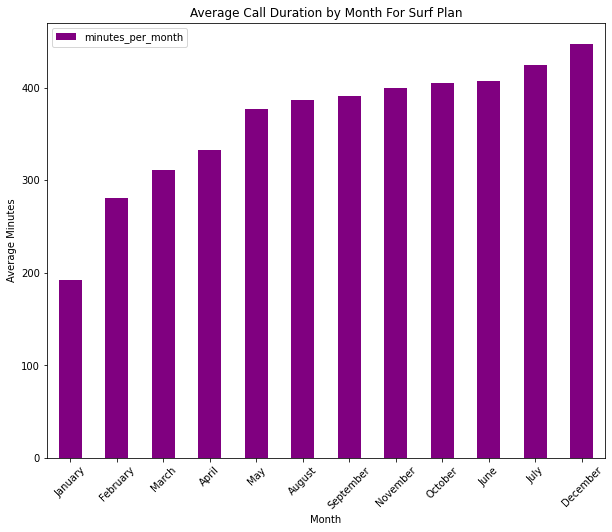

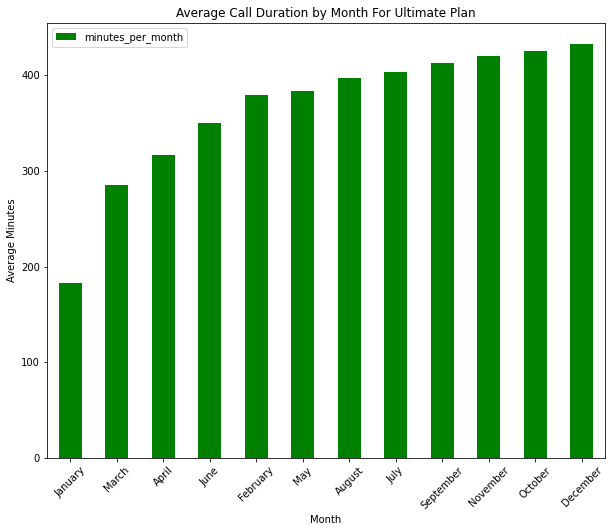

In [32]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.

#filter data for surf plan and ultimate plan
surf_plan = users_consume[users_consume["plan"] == "surf"]
ultimate_plan = users_consume[users_consume["plan"] == "ultimate"]

#group data by month and calculate the average of minutes spent per month round to the third decimal number
surf_average_duration = surf_plan.groupby("month").agg({"minutes_per_month": "mean"}).round(3).sort_values("minutes_per_month")
ultimate_average_duration = ultimate_plan.groupby("month").agg({"minutes_per_month": "mean"}).round(3).sort_values("minutes_per_month")


surf_average_duration.plot(kind = "bar", xlabel = "Month", ylabel = "Average Minutes",
                      title = "Average Call Duration by Month For Surf Plan", rot = 45,
                      figsize=(10, 8), color = "Purple")
ultimate_average_duration.plot(kind = "bar", xlabel = "Month", ylabel = "Average Minutes",
                      title = "Average Call Duration by Month For Ultimate Plan", rot = 45,
                      figsize=(10, 8), color = "Green")

plt.show()

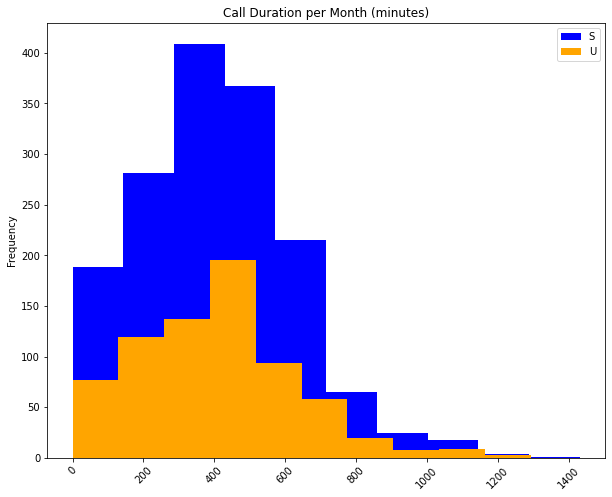

In [33]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.

surf_minutes = users_consume["minutes_per_month"][users_consume["plan"] == "surf"]
ultimate_minutes = users_consume["minutes_per_month"][users_consume["plan"] == "ultimate"]

surf_minutes.plot(kind = "hist", xlabel = "Minutes", ylabel = "Frequency",
                      title = "Call Duration per Month (minutes)", rot = 45,
                      figsize=(10, 8), color = "Blue")

ultimate_minutes.plot(kind = "hist", xlabel = "Minutes", ylabel = "Frequency",
                      title = "Call Duration per Month (minutes)", rot = 45,
                      figsize=(10, 8), color = "Orange")

plt.legend("SU")
plt.show()

In [34]:
# Calcule a média e a variação da duração mensal das chamadas

mean_surf_duration = np.mean(surf_minutes) #average of minutes per month for surf plan
var_surf_duration = np.var(surf_minutes) # the variance of minutes per month for surf plan

print("Average of Calls Duration for Surf Plan:", mean_surf_duration)
print("Variance of Calls Duration for Surf Plan:", var_surf_duration)

mean_ultimate_duration = np.mean(ultimate_minutes) #average of minutes per month for ultimate plan
var_ultimate_duration = np.var(ultimate_minutes) # the variance of minutes per month for ultimate plan

print("Average of Calls Duration for Ultimate Plan:", mean_ultimate_duration)
print("Variance of Calls Duration for Ultimate Plan:", var_ultimate_duration)


Average of Calls Duration for Surf Plan: 404.76239033693577
Variance of Calls Duration for Surf Plan: 49103.8683332564
Average of Calls Duration for Ultimate Plan: 406.19308333333333
Variance of Calls Duration for Ultimate Plan: 51569.24783077083


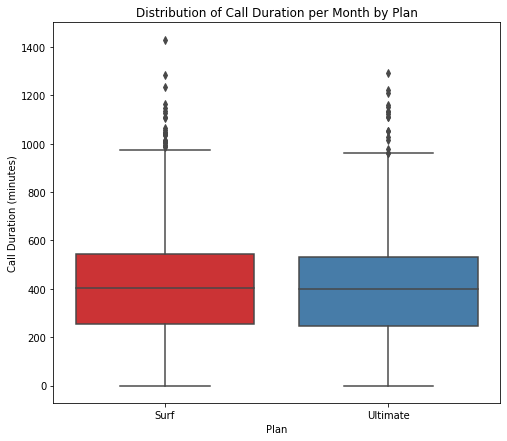

In [35]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

#combine both graph together and rename their name accroding to the type of plan
combined_duration = pd.concat([surf_minutes.rename("Surf"), ultimate_minutes.rename("Ultimate")], axis=1)

# Plot the boxplots
plt.figure(figsize=(8, 7)) #graph size
sns.boxplot(data = combined_duration, palette="Set1") #palette is used to set graph colors
plt.title("Distribution of Call Duration per Month by Plan") #graph title
plt.xlabel("Plan") #x-axis label
plt.ylabel("Call Duration (minutes)") #y-axis label
plt.show()

For the Surf plan, the average call duration is approximately 404.76 minutes, with a variance of about 49103.87.

For the Ultimate plan, the average call duration is approximately 406.19 minutes, with a variance of about 51569.25.

The minimum duration for both plans is 0 minutes and the maximum is approximately 1000 minutes.

Based on these information, we can state that,  both plans have quite similar averages, with minimal difference. The variance is also comparable between the two plans, indicating a similar spread of data around the mean, however the higher variance indicates that there is substantial variability in callas duration values throughout the dataset, even within this range.

So, there doesn't seem to be substantially different behavior between users of the Surf and Ultimate plans in terms of call duration.

"We can note that the limit of minutes included in Surf Plan equals 500 while in Ultimate Plan is 3000 which indicates that Surf Plan user consume approximately all the limit given while Ultimate Plan users consume less than half of the limit."

### Mensagens

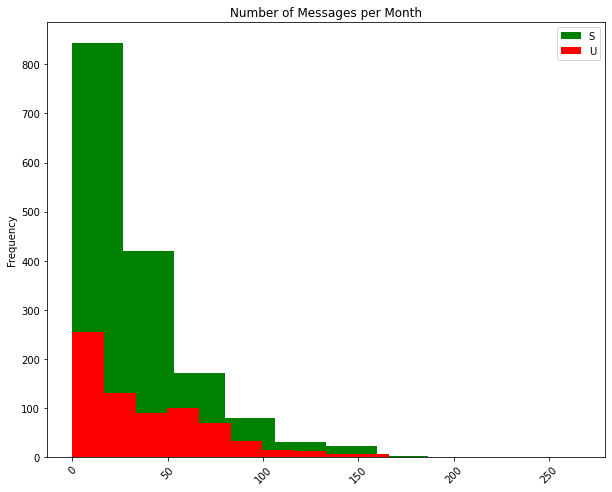

In [36]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

surf_messages = users_consume["messages_per_month"][users_consume["plan"] == "surf"]
ultimate_messages = users_consume["messages_per_month"][users_consume["plan"] == "ultimate"]

surf_messages.plot(kind = "hist", xlabel = "Messages", ylabel = "Frequency",
                      title = "Number of Messages per Month", rot = 45,
                      figsize=(10, 8), color = "Green")

ultimate_messages.plot(kind = "hist", xlabel = "Messages", ylabel = "Frequency",
                      title = "Number of Messages per Month", rot = 45,
                      figsize=(10, 8), color = "Red")

plt.legend("SU")
plt.show()

In [37]:
# Calcule a média e a variação das mensages mensal dos planos

mean_surf_messages = np.mean(surf_messages) #average of messages per month for surf plan
var_surf_messages = np.var(surf_messages) # the variance of messages per month for surf plan

print("Average of Messages per Month for Surf Plan:", mean_surf_messages)
print("Variance of Messages per Month for Surf Plan:", var_surf_messages)

mean_ultimate_messages = np.mean(ultimate_messages) #average of messages per month for ultimate plan
var_ultimate_messages = np.var(ultimate_messages) # the variance of messages per month for ultimate plan

print("Average of Messages per Month for Ultimate Plan:", mean_ultimate_messages)
print("Variance of Messages per Month for Ultimate Plan:", var_ultimate_messages)

Average of Messages per Month for Surf Plan: 31.15956770502225
Variance of Messages per Month for Surf Plan: 1126.008231726662
Average of Messages per Month for Ultimate Plan: 37.55138888888889
Variance of Messages per Month for Ultimate Plan: 1207.0779147376545


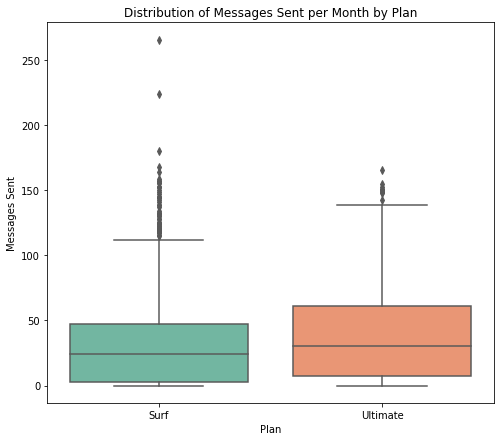

In [38]:
# Faça um diagrama de caixa para visualizar a distribuição das mesnsages mensal dos planos

#combine both graph together and rename their name accroding to the type of plan
combined_messages = pd.concat([surf_messages.rename("Surf"), ultimate_messages.rename("Ultimate")], axis=1)

# Plot the boxplots
plt.figure(figsize=(8, 7)) #graph size
sns.boxplot(data = combined_messages, palette="Set2") #palette is used to set graph colors
plt.title("Distribution of Messages Sent per Month by Plan") #graph title
plt.xlabel("Plan") #x-axis label
plt.ylabel("Messages Sent") #y-axis label
plt.show()

For the Surf plan, the average call duration is approximately 31.16 messages, with a variance of about 1126.01.

For the Ultimate plan, the average call duration is approximately 37.55 messages, with a variance of about 1207.08.

The minimum duration for both plans is 0 messages, and the maximum is aorund 110 messages for Surf plan and 140 messages for Ultimate Plan.

Based on these metrics, it's apparent that, on average, users of the Ultimate plan tend to send more messages than users of the Surf plan. This is evident from the difference in the average number of messages between the two plans.

Additionally, when considering the range of messages (from minimum to maximum), both plans have a similar range, with a slight difference in the maximum number of messages. Despite the different averages, the spread of data (variance) is comparable between the two plans, and indicates that there is substantial variability in messages values throughout the dataset, even within this range

So, we can infer that user behavior regarding message consumption tends to vary depending on the plan used.

"We can note that the limit of messages included in Surf Plan equals 50 while in Ultimate Plan is 100 which indicates that Surf Plan user consume approximately all the limit given while Ultimate Plan users consume less than half of the limit."

### Internet

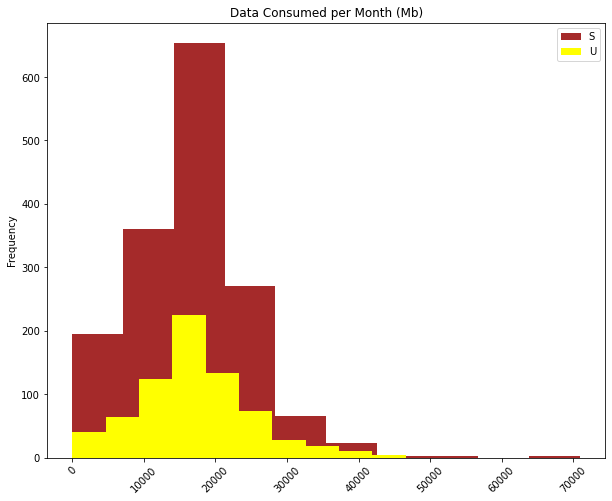

In [39]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

surf_data = users_consume["mb_per_month"][users_consume["plan"] == "surf"]
ultimate_data = users_consume["mb_per_month"][users_consume["plan"] == "ultimate"]

surf_data.plot(kind = "hist", xlabel = "Data", ylabel = "Frequency",
                      title = "Data Consumed per Month (Mb)", rot = 45,
                      figsize=(10, 8), color = "Brown")
ultimate_data.plot(kind = "hist", xlabel = "Data", ylabel = "Frequency",
                      title = "Data Consumed per Month (Mb)", rot = 45,
                      figsize=(10, 8), color = "Yellow")

plt.legend("SU")
plt.show()


In [40]:
# Calcule a média e a variação dos dados mensal dos planos

mean_surf_data = np.mean(surf_data) #average of data per month for surf plan
var_surf_data = np.var(surf_data) # the variance of data per month for surf plan

print("Average of Data per Month for Surf Plan:", mean_surf_data)
print("Variance of Data per Month for Surf Plan:", var_surf_data)

mean_ultimate_data = np.mean(ultimate_data) #average of data per month for ultimate plan
var_ultimate_data = np.var(ultimate_data) # the variance of data per month for ultimate plan

print("Average of Data per Month for Ultimate Plan:", mean_ultimate_data)
print("Variance of Data per Month for Ultimate Plan:", var_ultimate_data)

Average of Data per Month for Surf Plan: 16558.283490146216
Variance of Data per Month for Surf Plan: 64175571.68301331
Average of Data per Month for Ultimate Plan: 17214.699694444444
Variance of Data per Month for Ultimate Plan: 61566665.138686284


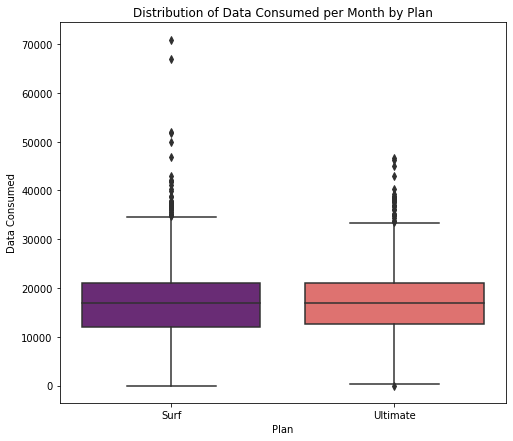

In [41]:
# Faça um diagrama de caixa para visualizar a distribuição dos dados mensal dos planos

#combine both graph together and rename their name accroding to the type of plan
combined_data = pd.concat([surf_data.rename("Surf"), ultimate_data.rename("Ultimate")], axis=1)

# Plot the boxplots
plt.figure(figsize=(8, 7)) #graph size
sns.boxplot(data = combined_data, palette="magma") #palette is used to set graph colors
plt.title("Distribution of Data Consumed per Month by Plan") #graph title
plt.xlabel("Plan") #x-axis label
plt.ylabel("Data Consumed") #y-axis label
plt.show()

For the Surf plan, the average call duration is approximately 16558.28 megabytes, with a variance of about 64175571.68.

For the Ultimate plan, the average call duration is approximately 17214.70 megabyte, with a variance of about 61566665.14.

The minimum duration for both plans is 0 megabyte, and the maximum is around 350000 megabyte for Surf plan and 34000 messages for Ultimate Plan.

The average data usage per month for users of the Ultimate plan compared to users of the Surf plan shows a minimal difference. Given this minimal difference in average data usage between the two plans, it suggests that, on average, users of both plans consume a comparable amount of internet data.

Both plans exhibit a large variance in data usage per month, with substantial variability in data consumption among users. This indicates that there is considerable diversity in how users utilize internet traffic within each plan.

While there may be slight variations in internet usage patterns between users of the Surf and Ultimate plans, the difference in average data usage is not substantial enough to conclude significant differences in behavior between the two groups.

Both plans seem to serve users with comparable internet consumption habits.

"We can note that the limit of data included in Surf Plan equals 15360 megabytes while for Ultimate Plan is 30720 megabytes which indicates that Surf Plan user consume more than the limit given while Ultimate Plan users consume aorund half of the limit."

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

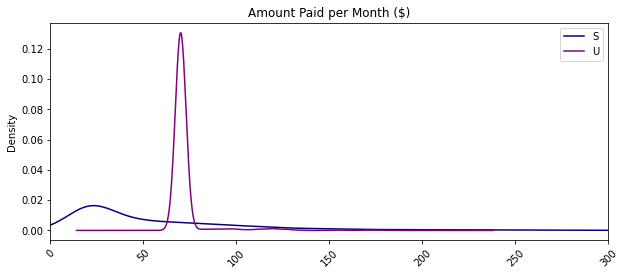

In [42]:
# Filter the data to include only the total charges per month for both plans
surf_total_charge = users_consume['total_charge'][users_consume["plan"] == "surf"]
ultimate_total_charge  = users_consume['total_charge'][users_consume["plan"] == "ultimate"]

surf_total_charge.plot(kind = "kde", xlabel = "Amount Paid", ylabel = "Frequency",
                      title = "Amount Paid per Month ($)", rot = 45,
                      figsize=(10, 4), xlim = [0, 300], color = "Navy")
ultimate_total_charge.plot(kind = "kde", xlabel = "Amount Paid", ylabel = "Frequency",
                      title = "Amount Paid per Month ($)", rot = 45,
                      figsize=(10, 4), xlim = [0, 300], color = "Purple")

plt.legend("SU")
plt.show() #kde is used to plot a curve graph

In [43]:
mean_surf_total_charge = np.mean(surf_total_charge) #average amount paid per month for surf plan
var_surf_total_charge = np.var(surf_total_charge) # the variance of amount per month for surf plan

print("Average Amount Paid per Month for Surf Plan:", mean_surf_total_charge)
print("Variance of Amount Paid per Month for Surf Plan:", var_surf_total_charge)

mean_ultimate_total_charge = np.mean(ultimate_total_charge) #average amount paid per month for ultimate plan
var_ultimate_total_charge = np.var(ultimate_total_charge) # the variance of amount per month for ultimate plan

print("Average Amount Paid per Month for Ultimate Plan:", mean_ultimate_total_charge)
print("Variance of Amount Paid per Month for Ultimate Plan:", var_ultimate_total_charge)

Average Amount Paid per Month for Surf Plan: 57.18044500953592
Variance of Amount Paid per Month for Surf Plan: 2883.383541823581
Average Amount Paid per Month for Ultimate Plan: 72.10972222222222
Variance of Amount Paid per Month for Ultimate Plan: 116.75601658950615


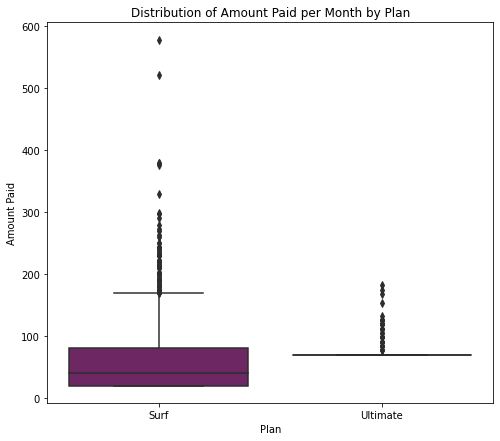

In [44]:
#combine both graph together and rename their name accroding to the type of plan
combined_data = pd.concat([surf_total_charge.rename("Surf"), ultimate_total_charge.rename("Ultimate")], axis=1)

# Plot the boxplots
plt.figure(figsize=(8, 7)) #graph size
sns.boxplot(data = combined_data, palette="inferno") #palette is used to set graph colors
plt.title("Distribution of Amount Paid per Month by Plan") #graph title
plt.xlabel("Plan") #x-axis label
plt.ylabel("Amount Paid") #y-axis label
plt.show()

We can see that, for the Surf plan, the average amount paid per month equals 57.18 which is significantly higher compared to the base cost 20. This indicates that users of this plan tend to to utilize more services beyond the base package limits, incurring substantial additional charges.

However, for the Ultimate plan, the average amount paid per month equals 72.11 close to its base package cost 70, showing that users of the Ultimate plan are less likely to exceed the package limits and incur additional charges beyond the base cost.

The variance is higher for the Surf plan 2883.38 compared to the Ultimate plan 116.76. This indicates greater variability in the charges incurred by users of the Surf plan, possibly due to more diverse usage patterns or a larger range of additional charges.

It can be concluded that, the Surf plan generates higher revenue per user due to significant additional charges beyond the base package cost (plus 37), while the Ultimate plan tends to generate revenue closer to its base package cost.(noting that users of Surf plan 339 users are more that of Ultimate Plan 161 users)

<div class="alert alert-block alert-success">
<b>Comentário final </b> <a class="tocSkip"></a>

- O processamento de dados foi realizado corretamente.    
- O aluno adicionou comentários do passo a passo do código.   
- Os gráficos apresentam ótima qualidade.   



</div>

## Teste hipóteses estatísticas

To test the hypothesis that the average revenues of users in the Ultimate and Surf calling plans are different, we can formulate the following null and alternative hypotheses:

Null Hypothesis (H0): There average revenues between users in the Ultimate and Surf plans is equal.

Alternative Hypothesis (H1): There is a significant difference in the average revenues for users of the Ultimate and Surf plans.

As we have two plans with different limits and specific cost we will perform a two-sample independent t-test with a significance level (alpha value) equals to 0.05 (5%) be compared with.

In [45]:
# Teste as hipóteses

alpha = 0.05

#test hypothesis that the average revenues for both plans are equal
results = st.ttest_ind(surf_total_charge, ultimate_total_charge, equal_var = False)

print('p-value:', results.pvalue) #print p-value

if (results.pvalue < alpha): # compare p-value with the significance level alpha
    print("Reject Null Hypothesis")
else:
    print("Cannot reject the Null Hypothesis")

p-value: 2.273456511301432e-25
Reject Null Hypothesis


To test the hypothesis that the average revenues of users in the NY-NJ area differs from that one in other areas, we can formulate the following null and alternative hypotheses:

Null Hypothesis (H0): There average revenues between users of NY-NJ area and users of other areas is equal.

Alternative Hypothesis (H1): There is a significant difference in the average revenues for users of NY-NJ area and users of other areas.

As we have to plans with different limits and specific cost we will do a t-test of two independent dataframes.

The significance level (alpha value) will be 0.05 (5%)

In [46]:
#Filter Data for NY-NJ area and for other areas

region_charges = pd.merge(user_df[["user_id","state"]], users_consume[["user_id","total_charge"]], on = "user_id", how = "outer")

region_charges
#print(region_charges["state"].unique()) #check regions name

NYNJ_total_charge = region_charges['total_charge'][region_charges["state"] == "NY-NJ-PA MSA"] #NY-NJ total charge
OREG_total_charge  = region_charges['total_charge'][region_charges["state"] != "NY-NJ-PA MSA"] #other regions total charge


NYNJ_total_charge  = NYNJ_total_charge.fillna(0) #remove for null values
OREG_total_charge = OREG_total_charge.fillna(0) ##remove for null values

In [47]:
# Check Average and Variance of the Regions

mean_NYNJ_total_charge = np.mean(NYNJ_total_charge) #average amount paid per month for NY-NJ region users
var_NYNJ_total_charge = np.var(NYNJ_total_charge) # the variance amount per month for NY-NJ region users

print("Average Amount Paid per Month for NY-NJ region users:", mean_NYNJ_total_charge)
print("Variance of Amount Paid per Month for NY-NJ region users:", var_NYNJ_total_charge)

mean_OREG_total_charge = np.mean(OREG_total_charge) #average amount paid per month for other region users
var_OREG_total_charge = np.var(OREG_total_charge) # the variance amount per month for other region users

print("Average Amount Paid per Month for other regions users:", mean_OREG_total_charge)
print("Variance of Amount Paid per Month for other regions users:", var_OREG_total_charge)

Average Amount Paid per Month for NY-NJ region users: 56.971613756613756
Variance of Amount Paid per Month for NY-NJ region users: 1774.2767040095466
Average Amount Paid per Month for other regions users: 62.508348051948055
Variance of Amount Paid per Month for other regions users: 2123.356610881457


In [48]:
# Teste as hipóteses

alpha = 0.05

#test hypothesis that the average revenues for regions are equal
results = st.ttest_ind(NYNJ_total_charge, OREG_total_charge, equal_var = False)

print('p-value:', results.pvalue) #print p-value

if (results.pvalue < alpha): # compare p-value with the significance level alpha
    print("Reject Null Hypothesis")
else:
    print("Cannot reject the Null Hypothesis")

p-value: 0.021979073641742338
Reject Null Hypothesis


<div class="alert alert-block alert-success">
<b>Comentário final </b> <a class="tocSkip"></a>

Os testes de hipótese foram realizados corretamente. 



</div>

## Conclusão geral

[Liste suas conclusões importantes nessa seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

To conduct a comprehensive analysis of Megaline's prepaid plans (Surf and Ultimate) we have followed a structured approach to clean, analyze, and compare the data from 500 customers. The analysis aims to determine which plan generates more revenue.

We have imported the data and cleaned it by ensuring that there are no duplicate records in any of the dataframes, identifying and handling any missing values and ensuring all columns have the correct data types for analysis.

Then we have conducted data Aggregation and calculation for all services of both plans such as, calls Duration, messages and data consumption)

After that, we have total calculated revenue for both plans and started analysing and comparing by using graphs and calculating the average revenue and variance for each service.

Finally, we have assumed a hypothesis and conducted a t-test for revenue comparison between plans and between regions, which confirmed that the revenues are different

After all the process followed above, we have concluded that:

The Surf plan generates more revenue per user despite its lower base cost. Surf plan users frequently exceed their 500-minute, 50-message, and 15360 MB data limits, leading to significant additional charges. The average monthly revenue for Surf users is 57.18, compared to the base cost of 20, showing substantial extra usage costs. In contrast, Ultimate plan users, with a higher base cost of 70 and much higher usage limits (3000 minutes, 100 messages, and 30720 MB), tend to stay within their plan limits, resulting in an average monthly revenue of 72.11.

Thus, the Surf plan's revenue is driven by additional costs incurred by users exceeding their plan limits.

<div class="alert alert-block alert-success">
<b>Comentário final </b> <a class="tocSkip"></a>

Parabéns, Wail!👏🚀

Seu trabalho demonstra excelente qualidade, com uma linha de raciocínio correta e um código bem estruturado. 

Continue com o ótimo trabalho! 



</div>